In [1]:
from glob import glob
import random

import cv2
import matplotlib.pyplot as plt

In [2]:
image_paths = glob('./data/driving_coco/images/train/*.jpg') + glob('./data/driving_coco/images/val/*.jpg')
image_paths = sorted(image_paths)
len(image_paths)

37084

In [3]:
label_paths = glob('./data/driving_coco/labels/train/*.txt') + glob('./data/driving_coco/labels/val/*.txt')
label_paths = sorted(label_paths)
len(label_paths)

37084

In [4]:
color = (255, 0, 0) 
thickness = 2
font = cv2.FONT_HERSHEY_SIMPLEX 
fontScale = 1

Random index 16055
Image shape (300, 480, 3)
Start point (24, 137)
End point (34, 157)
Start point (38, 134)
End point (46, 162)
Start point (43, 122)
End point (72, 196)
Start point (64, 115)
End point (85, 192)
Start point (87, 70)
End point (315, 263)
Start point (289, 98)
End point (477, 177)
Start point (341, 129)
End point (478, 179)


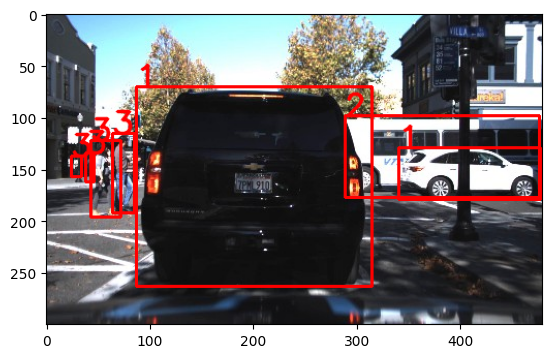

In [5]:
rand_idx = random.randint(0, len(image_paths))
print('Random index', rand_idx)
image_path, label_path = image_paths[rand_idx], label_paths[rand_idx]

img = cv2.imread(image_path)
print('Image shape', img.shape)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
with open(label_path, 'r') as file:
    lines = file.readlines()
    for line in lines:
        label_info = line.split()
        class_idx = label_info[0]
        bbox = [float(i) for i in label_info[1:]]
        x1 = bbox[0] - bbox[2] / 2
        x2 = bbox[0] + bbox[2] / 2
        y1 = bbox[1] - bbox[3] / 2
        y2 = bbox[1] + bbox[3] / 2
        start_point = (int(x1 * img.shape[1]), int(y1 * img.shape[0]))
        end_point = (int(x2 * img.shape[1]), int(y2 * img.shape[0]))
        # print('Start point', start_point)
        # print('End point', end_point)
        img = cv2.rectangle(img, start_point, end_point, color, thickness)
        img = cv2.putText(img, class_idx, start_point, font, fontScale, color, thickness, cv2.LINE_AA) 

plt.imshow(img)